In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

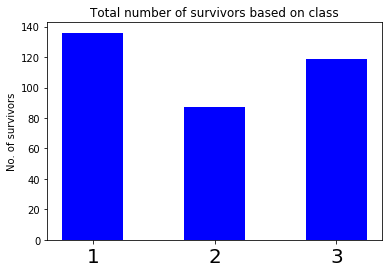

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [57]:
# import dataset
df = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# analyse data
# missing data
df['Pclass'].isnull().value_counts()
df['Survived'].isnull().value_counts()

survivors = df.groupby('Pclass')['Survived'].agg(sum) # passengers survived in each class

# total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors / total_passengers

# plotting
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivors, color='blue', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

# train data
y = df.iloc[:, 1].copy()
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].copy()
X.loc[X["Sex"] == "male", "Sex"] = 0
X.loc[X["Sex"] == "female", "Sex"] = 1

X["Embarked"] = X["Embarked"].fillna("S")
X.loc[X["Embarked"] == "S", "Embarked"] = 0
X.loc[X["Embarked"] == "C", "Embarked"] = 1
X.loc[X["Embarked"] == "Q", "Embarked"] = 2

# test data
y_test = test.iloc[:, 1].copy()
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].copy()

X_test.loc[X_test["Sex"] == "male", "Sex"] = 0
X_test.loc[X_test["Sex"] == "female", "Sex"] = 1

from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)
imputer = imputer.fit(X.iloc[:, 2:3])
X.iloc[:, 2:3] = imputer.transform(X.iloc[:, 2:3])

X_test["Embarked"] = X_test["Embarked"].fillna("S")
X_test.loc[X_test["Embarked"] == "S", "Embarked"] = 0
X_test.loc[X_test["Embarked"] == "C", "Embarked"] = 1
X_test.loc[X_test["Embarked"] == "Q", "Embarked"] = 2

imputer_test = Imputer(missing_values="NaN", strategy="mean", axis=0)
imputer = imputer.fit(X_test.iloc[:, 2:3])
X_test.iloc[:, 2:3] = imputer.transform(X_test.iloc[:, 2:3])

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X_test = sc_X.transform(X_test)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivor_percentage.index.values.tolist(), survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

In [ ]:
# male and female survivors based on class
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)
total_male_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survivors / total_male_passengers
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)
total_female_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors / total_female_passengers

fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect = ax.bar(index, male_survivors, bar_width, color='blue', label='men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='yellow', label='women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index+bar_width/2)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# percentage male and female survivors based on class

fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='yellow', label='women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index+bar_width/2)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# total number of nonsurvivors with family based on class


In [ ]:
# percentage of nonsurvivors with family based on class


In [58]:
# implement random forest regression

from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 5)
regressor.fit(X, y)
pred = regressor.predict(X_test)
type(y_test)
type(pred)
a = (pred == y_test).tolist()
count = 0
total = 0
for i in a:
    total += 1
    if(i):
        count += 1
(count/total) * 100

16.74641148325359